# Burgers Equation



phi = 



dphi/dx =


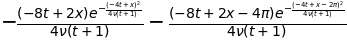


phi as a string:
exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))


In [60]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# imports for creating an animated plot
import matplotlib.animation as animation
from IPython.display import Video


# imports for symbolic math
import sympy
from IPython.display import display
sympy.init_printing(use_latex=True)

# expression for phi
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2 / (4*nu*(t+1))) + sympy.exp(-(x - 4*t - 2*sympy.pi)**2 / (4*nu*(t+1))) 
print("\nphi = ")
display(phi)

# differentiate phi
dphi_dx = phi.diff(x)
dphi_dx
print("\ndphi/dx =")
display(dphi_dx)

print("\nphi as a string:")
print(phi)

# define u for initial conditions
u = -2*nu/phi * dphi_dx + 4

# create callable function from definition of u 
ufunc = sympy.lambdify((x, t,  nu), u)
ufunc(4,1,3) # sample test

Text(0, 0.5, 'u')

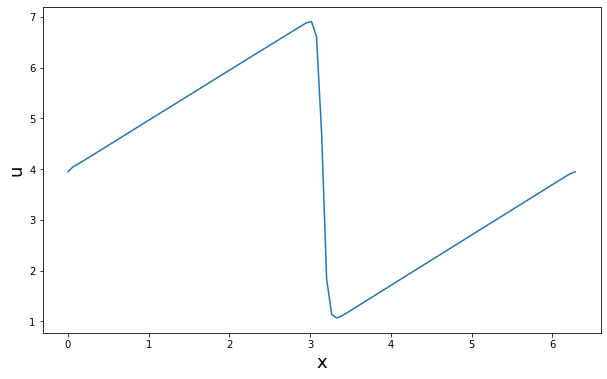

In [48]:
x_start, x_end = 0, 2*np.pi
nodes_x = 101
steps_t = 100
nu = 0.07
dx = (x_end - x_start) / (nodes_x - 1)
dt = dx * nu
alpha = dt/dx
x  = np.linspace(x_start, x_end, nodes_x)
u0 = np.asarray([ufunc(xi, 0, nu) for xi in x]) 

u1 = u0
u2 = u0
U = np.zeros([steps_t, nodes_x])

for n in range (steps_t):
    for i in range (1, nodes_x - 1):
        u2[i]  = u1[i] - alpha*u1[i]*(u1[i] - u1[i-1]) + alpha*nu*(u1[i+1] - 2*u1[i] + u1[i-1])/dx
        u2[0]  = u1[0] - alpha*u1[0]*(u1[0] - u1[-2]) + alpha*nu*(u1[1] - 2*u1[0] + u1[-2])/dx
        u2[-1] = u2[0]    
    u1 = u2
    U[n,:] = u2

fig, ax = plt.subplots(figsize=[10,6])
ax.plot(x, U[0, :])
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("u", fontsize=18)


In [58]:
fig, ax = plt.subplots()
ax.set_xlim([x_start, x_end])
ax.set_ylim([0, np.amax(U[0,:])])
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("u", fontsize=18)

line, = ax.plot(x, u0)
time_text = ax.text(3,3,'')

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,

def animate(n):
    line.set_ydata(U[n,:]) 
    time_text.set_text(n)
    return line, time_text


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=50, blit=True, save_count=steps_t)

plt.close()
# save the animation
ani.save("Burgers_plot.mp4")
Video("Burgers_plot.mp4")

In [62]:

ani